<a href="https://colab.research.google.com/github/NiharikaAmritkar/AI-ML/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
x= df.iloc[:, [2,3]]
y= df.iloc[:, 4]

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train= sc_x.fit_transform(x_train)
x_test= sc_x.transform(x_test)

In [ ]:
#fitting the model
from sklearn.naive_bayes import GaussianNB
classifier= GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

<ipython-input-14-09c711c35f82>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],


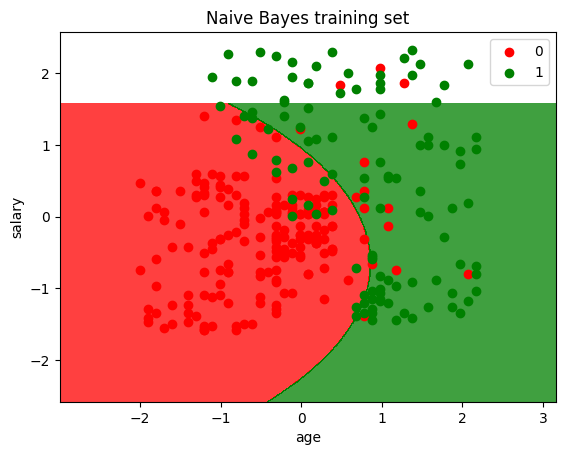

In [ ]:
#visualizing the training set
from matplotlib.colors import ListedColormap
x_set, y_set= x_train, y_train
x1, x2= np.meshgrid(np.arange(start= x_set[:, 0].min()-1, stop= x_set[:, 0].max()+1, step= 0.01),
                    np.arange(start= x_set[:, 1].min()-1, stop= x_set[: 1].max()+1, step= 0.01 ))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim=(x1.min(), x1.max())
plt.ylim= (x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],
              c= ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes training set')
plt.xlabel('age')
plt.ylabel('salary')
plt.legend()
plt.show()

<ipython-input-15-06f35f4d2ec3>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],


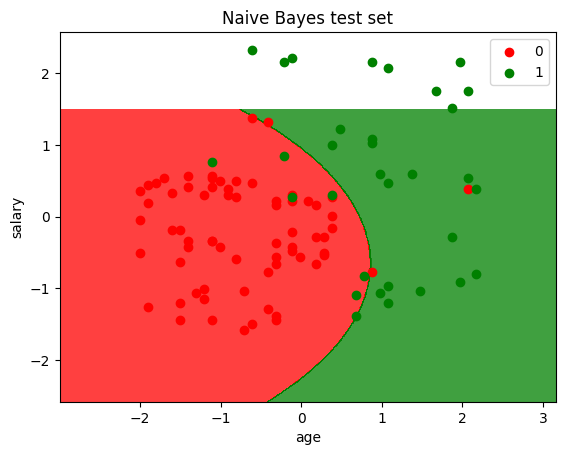

In [ ]:
#visualizing the test set
from matplotlib.colors import ListedColormap
x_set, y_set= x_test, y_test
x1, x2= np.meshgrid(np.arange(start= x_set[:, 0].min()-1, stop= x_set[:, 0].max()+1, step= 0.01),
                    np.arange(start= x_set[:, 1].min()-1, stop= x_set[: 1].max()+1, step= 0.01 ))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim=(x1.min(), x1.max())
plt.ylim= (x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set==j, 0], x_set[y_set==j, 1],
              c= ListedColormap(('red', 'green'))(i), label=j)

plt.title('Naive Bayes test set')
plt.xlabel('age')
plt.ylabel('salary')
plt.legend()
plt.show()